In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("placement.csv")

In [5]:
df.shape

(1000, 3)

In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\python3.9.7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


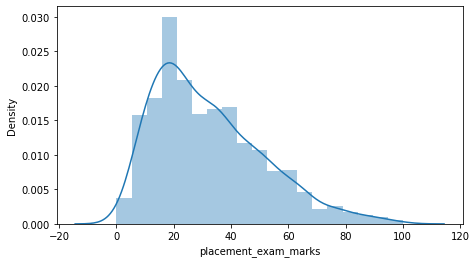

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.show()

we can see that placment_exam_marks distribution is skewed so we will be applying iqr proximity rule 

In [14]:
df['placement_exam_marks'].skew()  #this is far from zero means it is right skewed

0.8356419499466834

In [16]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


we can see that Q1=17 Q2=28 Q3=44but lets calcualte to cross check

In [20]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q2=df['placement_exam_marks'].quantile(0.50)
Q3=df['placement_exam_marks'].quantile(0.75)

In [22]:
IQR =Q3-Q1 #Inter Quantile Range

In [23]:
IQR

27.0

C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

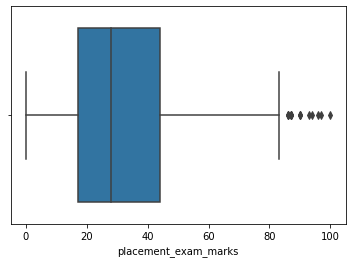

In [24]:
#lets plot Boxplot to see outliers 
sns.boxplot(df['placement_exam_marks'])

In [27]:
# upper bound of whisker 
higher=Q3+1.5*IQR

In [28]:
higher

84.5

In [29]:
lower=Q1-1.5*IQR

In [30]:
lower

-23.5

* Trimming 

In [36]:
len(df[df['placement_exam_marks']>higher])
df[df['placement_exam_marks']<lower]

,cgpa,placement_exam_marks,placed


their are 15 outlier ,lets remove this 

In [44]:
new_df=df[df['placement_exam_marks']<higher]

In [45]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

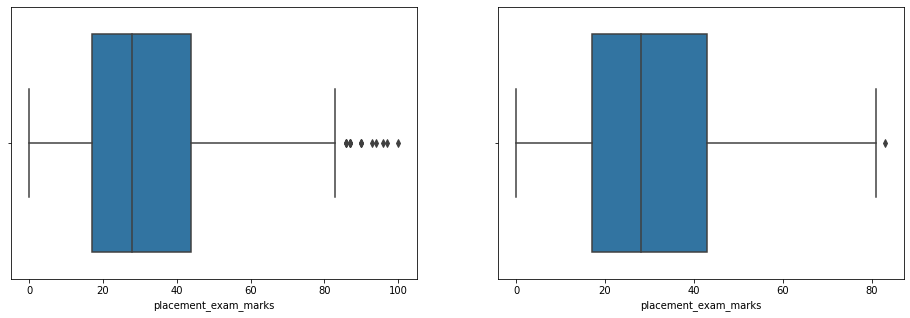

In [47]:
#comparision before and after

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])

Since there is so many outlier lets try clapping too

* Clapping : filling greater than highest with highest and lowerst with lowe

In [52]:
df['placement_exam_marks']=np.where(
    df['placement_exam_marks']>higher,
    higher ,
    np.where(
    df['placement_exam_marks']<lower,
    lower,
        df['placement_exam_marks']
    )
)

In [54]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


C:\python3.9.7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

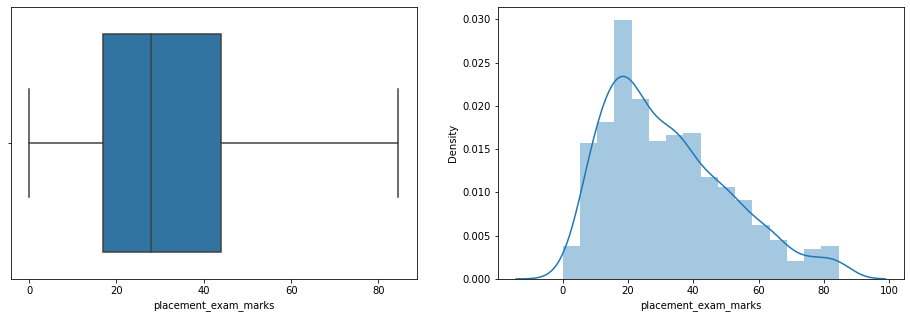

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
 
    